In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Pictures Group

In [2]:
pictures_data = pd.read_csv("pictures_data.csv")
pictures_data.head()

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,fe80::e2ce:c3ff:fe1a:1978,ff02::1,ICMPv6,174,Router Advertisement from e0:ce:c3:1a:19:78
1,2,0.014506,fe80::a8c:14f0:c17c:d903,ff02::16,ICMPv6,150,Multicast Listener Report Message v2
2,3,0.304433,140.82.113.26,192.168.1.12,TLSv1.2,91,Application Data
3,4,0.304697,192.168.1.12,140.82.113.26,TLSv1.2,95,Application Data
4,5,0.393250,2606:4700::6812:3a2,2a00:a041:3c5d:4d00:605e:f34d:a502:2044,TLSv1.2,125,Application Data


In [3]:
pictures_data['Protocol'].value_counts()

TCP        2992
TLSv1.3    1165
TLSv1.2     274
ICMPv6       46
MDNS         27
SSDP         16
ARP          11
DNS          10
0x86dd       10
IGMPv2        2
IGMPv3        1
DHCP          1
Name: Protocol, dtype: int64

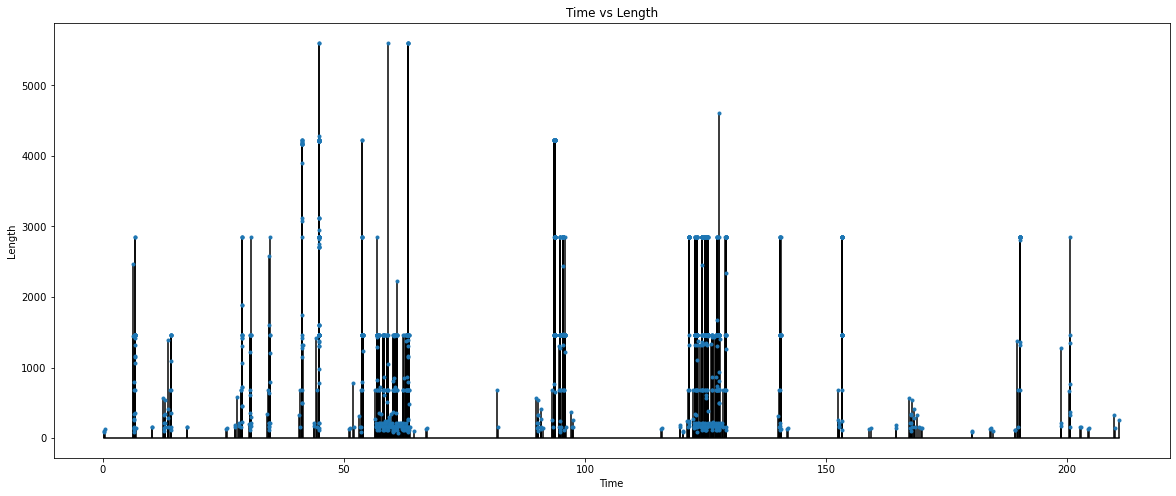

In [5]:
pictures_data_filtered = pictures_data[pictures_data['Protocol'].str.contains('TLS')] 

time = pictures_data_filtered['Time']
len = pictures_data_filtered['Length']
plt.figure(figsize=(20,8)) 
plt.stem(time, len,linefmt ='black',markerfmt = '', basefmt='black')
plt.xlabel('Time')
plt.ylabel('Length')
plt.title('Time vs Length')
plt.show()

### Video Group 

In [6]:
video_data = pd.read_csv("video_data.csv")
video_data.head()

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000e+00,192.168.1.18,224.0.0.251,MDNS,101,Standard query 0x0000 SRV Roku 3 1GJ37V01468...
1,2,4.520000e-07,192.168.1.18,224.0.0.251,MDNS,182,"Standard query response 0x0000 SRV, cache flus..."
2,3,6.756179e+00,192.168.1.10,224.0.0.251,MDNS,91,"Standard query 0x0000 PTR _raop._tcp.local, ""Q..."
3,4,8.029800e+00,192.168.1.12,157.240.221.60,TLSv1.2,135,Application Data
4,5,8.109785e+00,157.240.221.60,192.168.1.12,TCP,66,443 > 45474 [ACK] Seq=1 Ack=70 Win=325 Len=0...


In [7]:
video_data['Protocol'].value_counts()

TCP        287
TLSv1.2    126
ICMPv6      48
TLSv1.3     42
MDNS        25
DNS         24
SSDP        16
ARP          6
HTTP         3
IGMPv2       2
DHCP         2
IGMPv3       1
0x86dd       1
Name: Protocol, dtype: int64

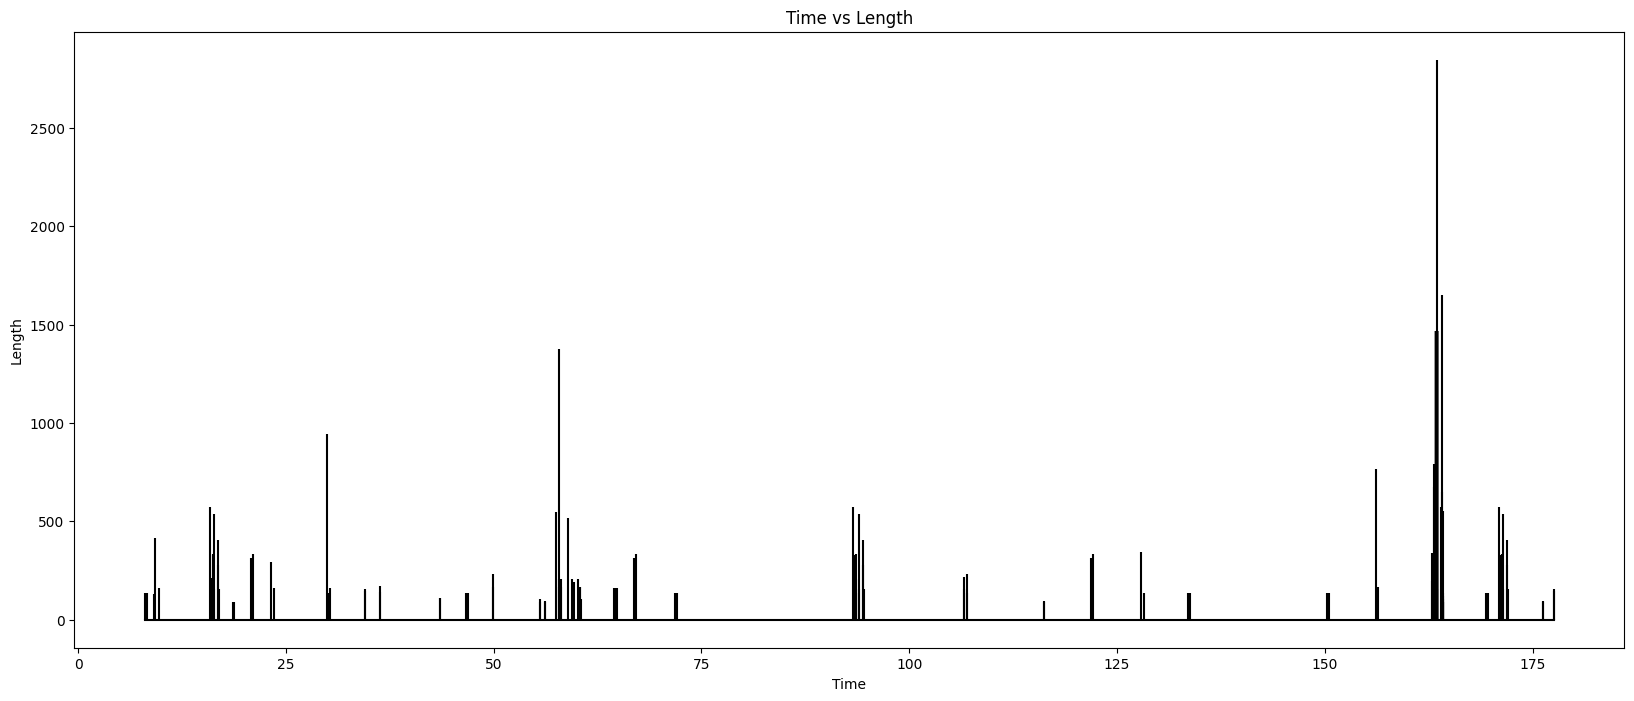

In [10]:
video_data_filtered = video_data[video_data['Protocol'].str.contains('TLS')] 

time = video_data_filtered['Time']
len = video_data_filtered['Length']
plt.figure(figsize=(20,8)) 
plt.stem(time, len,linefmt ='black',markerfmt = '', basefmt='black')
plt.xlabel('Time')
plt.ylabel('Length')
plt.title('Time vs Length')
plt.show()

In [8]:
video_data2 = pd.read_csv("video_data2.csv", encoding='latin-1')
video_data2.head()

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,140.82.114.25,192.168.1.12,TLSv1.2,92,Application Data
1,2,0.000269,192.168.1.12,140.82.114.25,TLSv1.2,96,Application Data
2,3,0.002356,192.168.1.12,157.240.221.60,TLSv1.2,139,Application Data
3,4,0.081017,157.240.221.60,192.168.1.12,TCP,66,443 > 58544 [ACK] Seq=1 Ack=74 Win=463 Len=0...
4,5,0.153721,140.82.114.25,192.168.1.12,TCP,66,443 > 37696 [ACK] Seq=27 Ack=31 Win=69 Len=0...


In [9]:
video_data2['Protocol'].value_counts()

TCP        2821
TLSv1.2     593
TLSv1.3     531
MDNS        261
ICMPv6      230
DNS         160
SSDP         63
QUIC         26
ARP          22
IGMPv2       21
HTTP          9
IGMPv3        7
BROWSER       4
NTP           2
Name: Protocol, dtype: int64

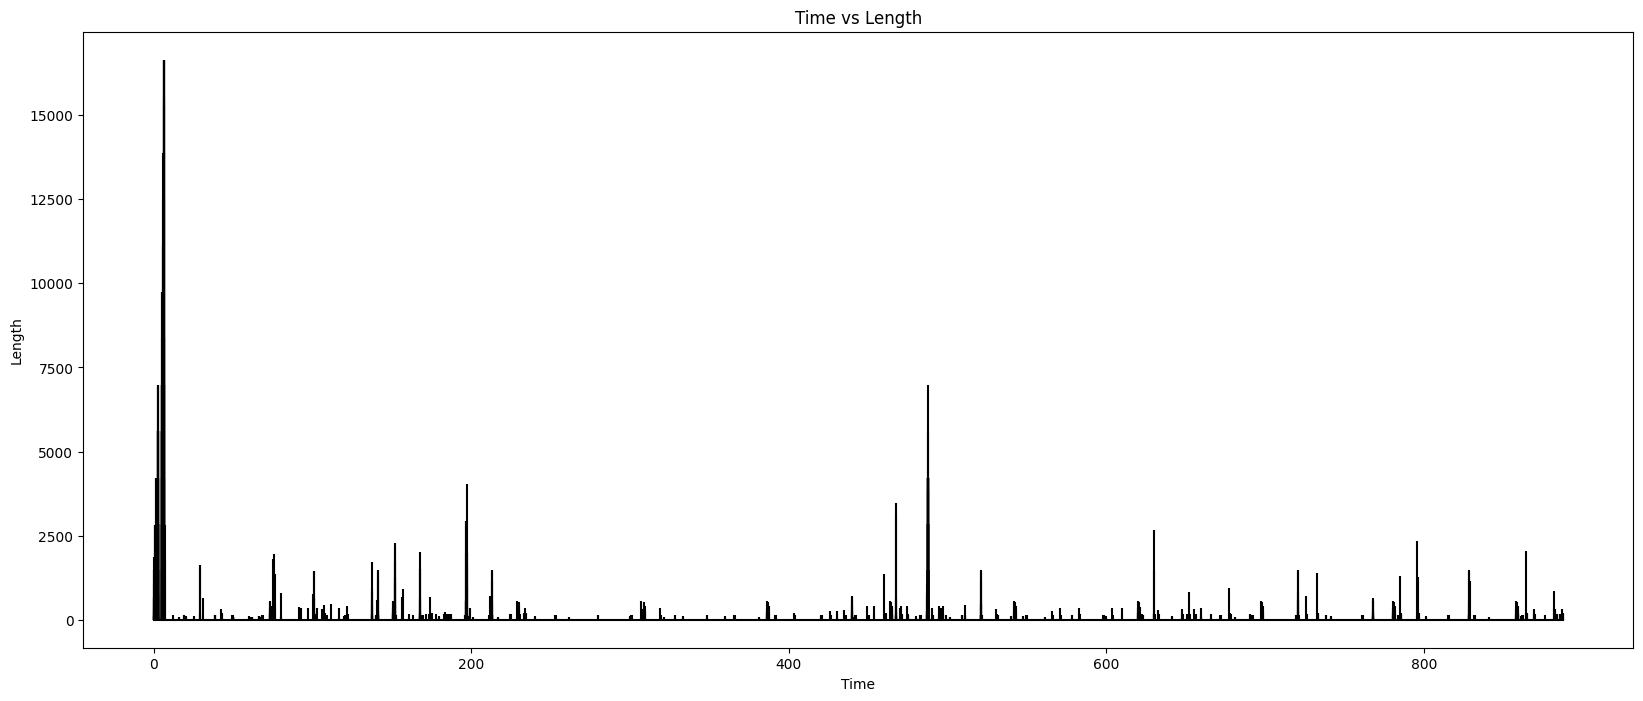

In [13]:
video_data2_filtered = video_data2[video_data2['Protocol'].str.contains('TLS')] 

time = video_data2_filtered['Time']
len = video_data2_filtered['Length']
plt.figure(figsize=(20,8)) 
plt.stem(time, len,linefmt ='black',markerfmt = '', basefmt='black')
plt.xlabel('Time')
plt.ylabel('Length')
plt.title('Time vs Length')
plt.show()

In [10]:

video_data3 = pd.read_csv("video_data_filter_ip.csv", encoding='latin-1')
video_data3.head()

,No.,Time,Source,Destination,Protocol,Length,Info
0,4,8.029800,192.168.1.12,157.240.221.60,TLSv1.2,135,Application Data
1,5,8.109785,157.240.221.60,192.168.1.12,TCP,66,443 > 45474 [ACK] Seq=1 Ack=70 Win=325 Len=0...
2,6,8.292460,157.240.221.60,192.168.1.12,TLSv1.2,137,Application Data
3,7,8.292497,192.168.1.12,157.240.221.60,TCP,66,45474 > 443 [ACK] Seq=70 Ack=72 Win=501 Len=...
4,8,9.101840,192.168.1.12,157.240.221.60,TLSv1.2,132,Application Data


In [11]:
print(video_data3['Source'].value_counts())
video_data3['Destination'].value_counts()

157.240.221.60    68
192.168.1.12      64
Name: Source, dtype: int64


192.168.1.12      68
157.240.221.60    64
Name: Destination, dtype: int64

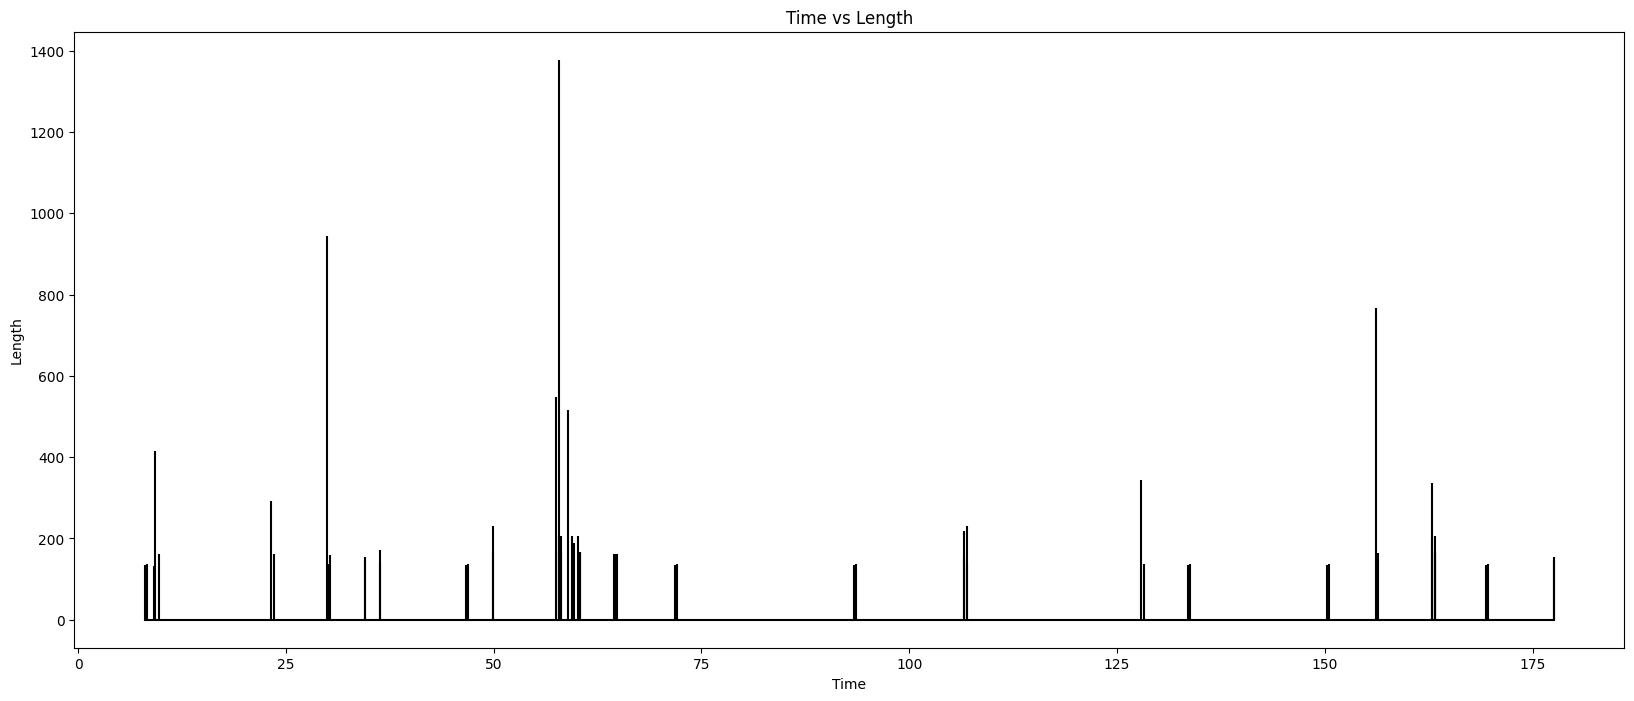

In [35]:
video_data3 = video_data3[video_data3['Protocol'].str.contains('TLS')]

time = video_data3['Time']
len = video_data3['Length']
plt.figure(figsize=(20,8)) 
plt.stem(time, len,linefmt ='black',markerfmt = '', basefmt='black')
plt.xlabel('Time')
plt.ylabel('Length')
plt.title('Time vs Length')
plt.show()

### Voice Group 

In [12]:
voice_data = pd.read_csv("voice_data.csv")
voice_data.head()

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000e+00,192.168.1.1,224.0.0.1,IGMPv2,42,"Membership Query, general"
1,2,2.420000e-07,192.168.1.1,224.0.0.1,IGMPv3,46,"Membership Query, general"
2,3,2.870000e-07,fe80::e2ce:c3ff:fe1a:1978,ff02::1,ICMPv6,90,Multicast Listener Query
3,4,2.021001e-01,192.168.1.15,224.0.0.251,IGMPv2,46,Membership Report group 224.0.0.251
4,5,1.431816e+00,fe80::e2ce:c3ff:fe1a:1978,ff02::1,ICMPv6,174,Router Advertisement from e0:ce:c3:1a:19:78


In [13]:
voice_data['Protocol'].value_counts()

TCP        638
TLSv1.2    163
TLSv1.3    152
ICMPv6      62
MDNS        54
DNS         38
SSDP        16
IGMPv2       6
ARP          4
HTTP         4
IGMPv3       2
Name: Protocol, dtype: int64

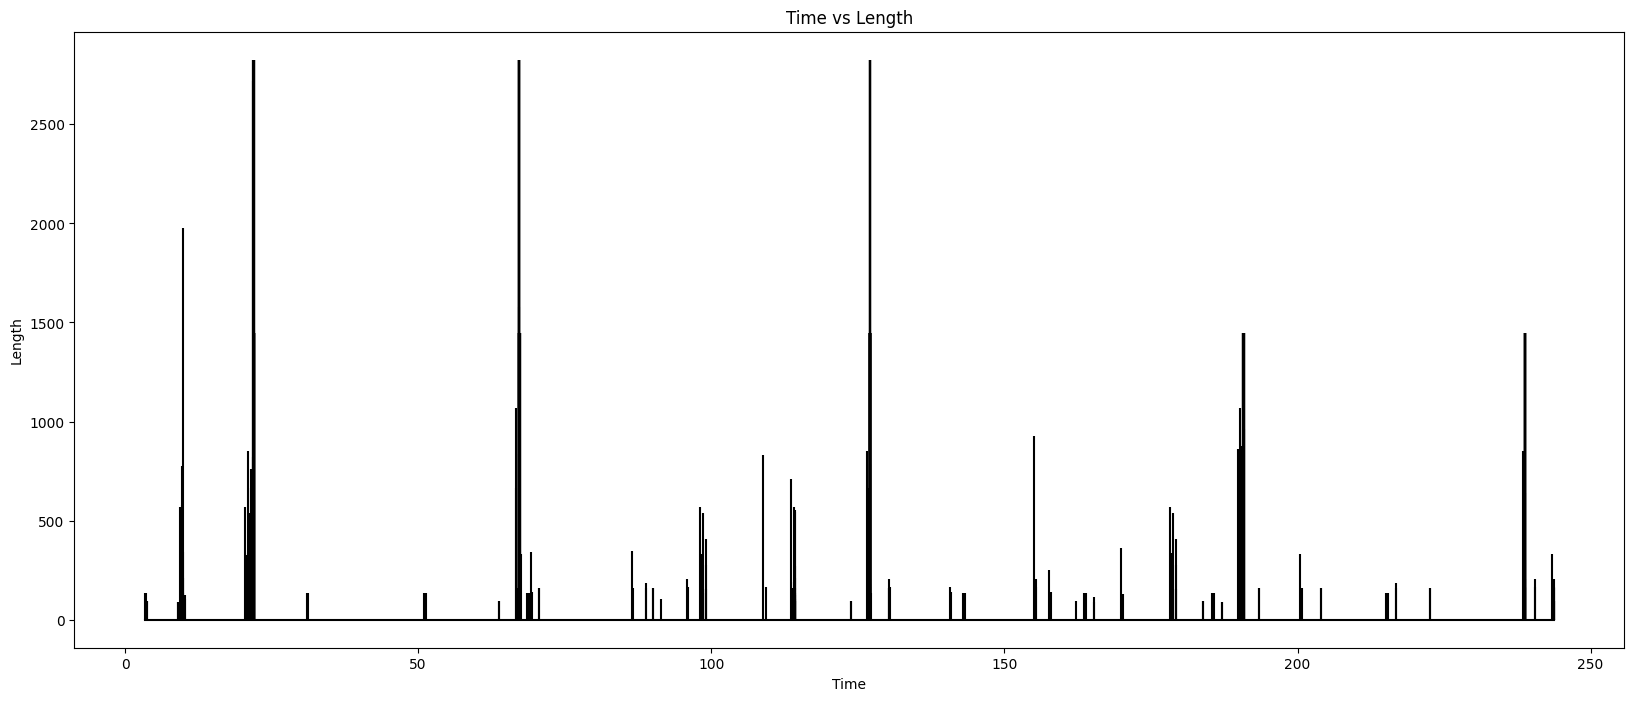

In [16]:
voice_data_filtered = voice_data[voice_data['Protocol'].str.contains('TLS')] 

time = voice_data_filtered['Time']
len = voice_data_filtered['Length']
plt.figure(figsize=(20,8)) 
plt.stem(time, len,linefmt ='black',markerfmt = '', basefmt='black')
plt.xlabel('Time')
plt.ylabel('Length')
plt.title('Time vs Length')
plt.show()

### Text Group

In [14]:
text_data = pd.read_csv("text_data.csv", encoding='latin-1')
text_data.head()

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000e+00,192.168.1.18,224.0.0.251,MDNS,101,Standard query 0x0000 SRV Roku 3 1GJ37V01468...
1,2,2.210000e-07,192.168.1.18,224.0.0.251,MDNS,182,"Standard query response 0x0000 SRV, cache flus..."
2,3,2.557890e+00,192.168.1.10,224.0.0.251,MDNS,91,"Standard query 0x0000 PTR _raop._tcp.local, ""Q..."
3,4,4.400858e+00,157.240.221.60,192.168.1.12,TLSv1.2,433,Application Data
4,5,4.444965e+00,192.168.1.12,157.240.221.60,TCP,66,45474 > 443 [ACK] Seq=1 Ack=368 Win=1015 Len...


In [15]:
text_data['Protocol'].value_counts()

TCP        385
TLSv1.2    250
MDNS       123
ICMPv6      82
DNS         56
QUIC        26
SSDP        16
IGMPv2      10
ARP          4
HTTP         4
IGMPv3       3
BROWSER      2
NTP          2
Name: Protocol, dtype: int64

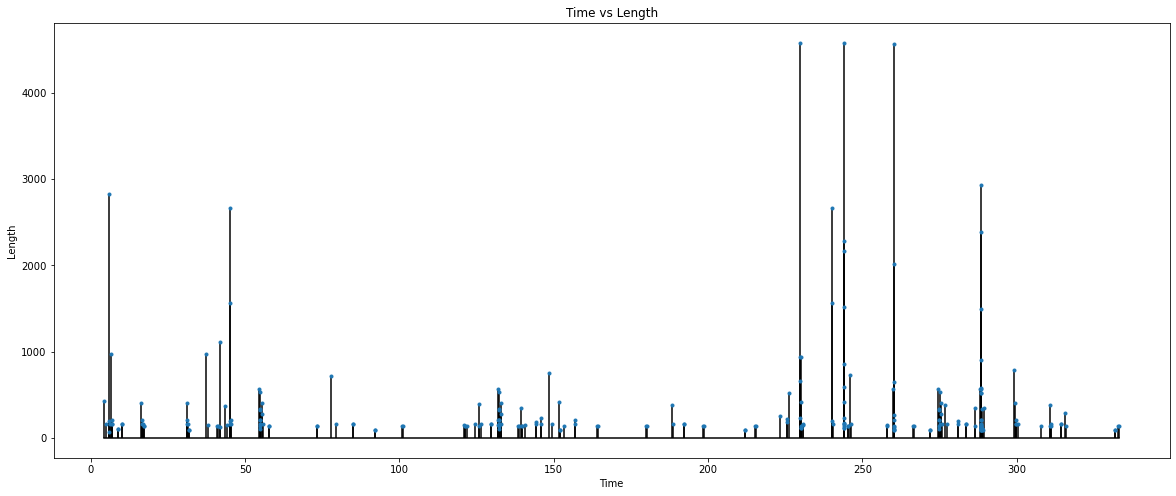

In [19]:
text_data_filtered = text_data[text_data['Protocol'].str.contains('TLS')] 

time = text_data_filtered['Time']
len = text_data_filtered['Length']
plt.figure(figsize=(20,8)) 
plt.stem(time, len,linefmt ='black',markerfmt = '', basefmt='black')
plt.xlabel('Time')
plt.ylabel('Length')
plt.title('Time vs Length')
plt.show()

In [20]:
my_bins=[]
for i in range(0, 101, 10):
    my_bins.append(f"{i}-{i+9}")
my_bins

['0-9',
 '10-19',
 '20-29',
 '30-39',
 '40-49',
 '50-59',
 '60-69',
 '70-79',
 '80-89',
 '90-99',
 '100-109']

In [21]:
#filtered length lower than 300 because it is likely to be noise
new_filtered = text_data_filtered.loc[text_data_filtered['Length'] > 300]
new_filtered

,No.,Time,Source,Destination,Protocol,Length,Info
3,4,4.400858,157.240.221.60,192.168.1.12,TLSv1.2,433,Application Data
10,11,6.040854,157.240.221.60,192.168.1.12,TLSv1.2,2826,Application Data
19,20,6.405551,157.240.221.60,192.168.1.12,TLSv1.2,972,Application Data
45,46,16.177360,157.240.221.60,192.168.1.12,TLSv1.2,402,"Application Data, Application Data"
72,73,31.030769,157.240.221.60,192.168.1.12,TLSv1.2,402,"Application Data, Application Data"
...,...,...,...,...,...,...,...
785,786,288.571197,13.69.116.104,192.168.1.12,TLSv1.2,341,Application Data
808,809,289.485473,51.132.193.105,192.168.1.12,TLSv1.2,343,Application Data
836,837,299.214179,157.240.221.60,192.168.1.12,TLSv1.2,786,Application Data
840,841,299.419316,157.240.221.60,192.168.1.12,TLSv1.2,402,"Application Data, Application Data"


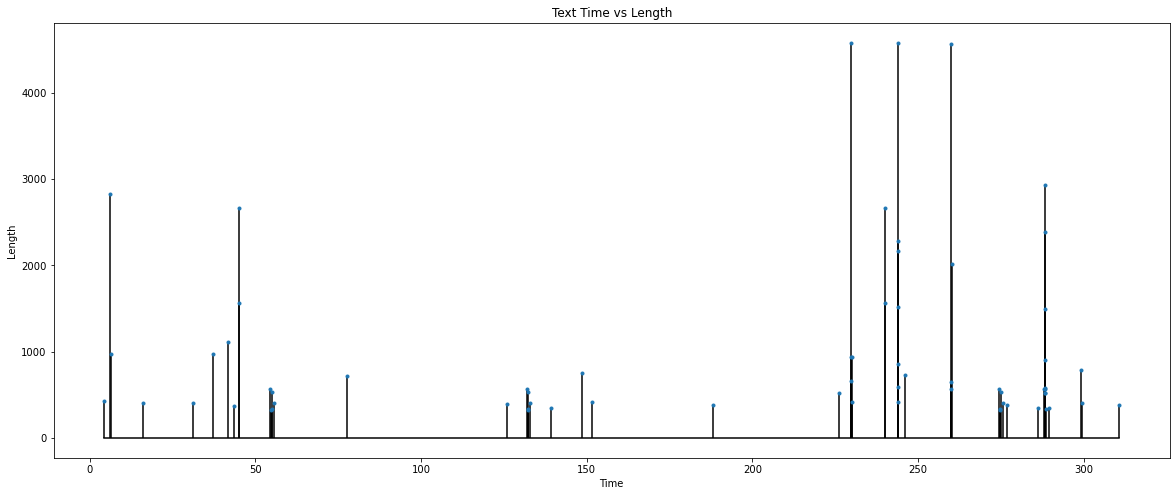

In [22]:
new_time = new_filtered['Time']
new_length = new_filtered['Length']
plt.figure(figsize=(20,8)) 
plt.stem(new_time, new_length,linefmt ='black',markerfmt = '.', basefmt='black')
plt.xlabel('Time')
plt.ylabel('Length')
plt.title('Text Time vs Length')
plt.show()

In [23]:
new_filtered_2 = new_filtered['Time'].diff().shift(-1)
new_filtered_2

3       1.639996
10      0.364697
19      9.771809
45     14.853410
72      6.138051
         ...    
785     0.914276
808     9.728706
836     0.205137
840    11.275717
899          NaN
Name: Time, Length: 67, dtype: float64

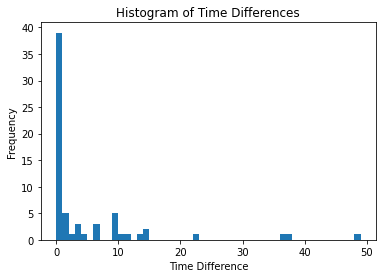

In [24]:
bins = range(0, 50) 

# Histogram 
plt.hist(new_filtered_2, bins=bins)

# Labels  
plt.xlabel('Time Difference')
plt.ylabel('Frequency')

# Title
plt.title('Histogram of Time Differences')

# Show plot
plt.show()